# SAILS

## (1) Datos de Glottolog

In [1]:
## usamos pandas para leer los datos

import pandas as pd

In [2]:
## diccionario iso:glottocode
## https://glottolog.org/meta/downloads

langs = pd.read_csv('languages_and_dialects_geo.csv',sep=',')

In [3]:
## filtramos por lenguas de las Américas

macroarea = langs[['glottocode','macroarea']]
macroarea = macroarea.dropna()

In [4]:
## creamos un diccionario iso:macroarea
## filtramos por macroarea 'South America' y 'North America'

macroarea = dict(zip(macroarea['glottocode'], macroarea['macroarea']))
macroarea = {language:macroarea[language] for language in macroarea.keys() if macroarea[language] in ['South America','North America']}

In [5]:
print(len(macroarea))

2382


In [6]:
## familias de las Américas

In [7]:
## miramos languoids

languoid = pd.read_csv('languoid.csv',sep=',')

In [8]:
languoid

id family_id parent_id                 name  bookkeeping  \
0      3adt1234  afro1255  nort3292           3Ad-Tekles        False   
1      aala1237  aust1307  ramo1244               Aalawa        False   
2      aant1238  nucl1709  nort2920           Aantantara        False   
3      aari1238  sout2845  ahkk1235           Aari-Gayil        False   
4      aari1239  sout2845  aari1238                 Aari        False   
...         ...       ...       ...                  ...          ...   
25434  zuti1239  tupi1275  guaj1255  Guajajára of Zutiua        False   
25435  zuwa1238  koia1260  omie1241              Zuwadza        False   
25436  zwal1238  atla1278  shal1242                Zwall        False   
25437  zyph1238  sino1245  nucl1757                Zyphe        False   
25438  zyud1238  ural1272  komi1269              Zyuzdin        False   

          level  latitude  longitude iso639P3code  description  \
0       dialect       NaN        NaN          NaN          NaN   
1       dialect       NaN        NaN          NaN          NaN   
2       dialect       NaN        NaN          NaN          NaN   
3        family       NaN        NaN          aiz          NaN   
4      language   5.95034    36.5721          aiw          NaN   
...         ...       ...        ...          ...          ...   
25434   dialect       NaN        NaN          NaN          NaN   
25435   dialect       NaN        NaN          NaN          NaN   
25436   dialect       NaN        NaN          NaN          NaN   
25437  language  22.52400    93.2640          zyp          NaN   
25438   dialect       NaN        NaN          NaN          NaN   

       markup_description  child_family_count  child_language_count  \
0                     NaN                   0                     0   
1                     NaN                   0                     0   
2                     NaN                   0                     0   
3                     NaN                   0                     2   
4                     NaN                   0                     0   
...                   ...                 ...                   ...   
25434                 NaN                   0                     0   
25435                 NaN                   0                     0   
25436                 NaN                   0                     0   
25437                 NaN                   0                     0   
25438                 NaN                   0                     0   

       child_dialect_count country_ids  
0                        0         NaN  
1                        0         NaN  
2                        0         NaN  
3                        0         NaN  
4                        0          ET  
...                    ...         ...  
25434                    0         NaN  
25435                    0         NaN  
25436                    0         NaN  
25437                    2       IN MM  
25438                    0         NaN  

[25439 rows x 15 columns]

In [9]:
## filtramos id:family_id (family)

location = languoid[['id','latitude','longitude']]
location = location.dropna()

In [10]:
location_lat = dict(zip(location['id'],location['latitude']))
location_lon = dict(zip(location['id'],location['longitude']))

In [11]:
location = {key:[location_lat[key],location_lon[key]] for key in location_lat.keys()}

In [12]:
len(location)

8437

In [13]:
## filtramos id:family_id (family)

id_family = languoid[['id','family_id']]
id_family = id_family.dropna()

In [14]:
## filtramos id:parent_id (genus)

glotto_iso = languoid[['id','iso639P3code']]
glotto_iso = glotto_iso.dropna()

In [15]:
## transformamos a diccionario

glotto_iso = dict(zip(glotto_iso['id'], glotto_iso['iso639P3code']))
glotto_iso = {language:glotto_iso[language] for language in glotto_iso.keys() if language in macroarea.keys()}

In [16]:
## transformamos a diccionario

id_family = dict(zip(id_family['id'], id_family['family_id']))
ID_family = {language:id_family[language] for language in id_family.keys() if  language in macroarea.keys()}

In [17]:
len(id_family)

25014

In [18]:
id_family['huil1244']

'arau1255'

## (2) Datos de SAILS

In [23]:
## rasgos

features_sails = pd.read_csv('features_sails.csv',sep=',')

In [24]:
features_sails=features_sails.rename(columns={'Unnamed: 0': 'features'})

In [25]:
len(list(features_sails.columns[1:]))

167

In [26]:
features=list(features_sails['features'])

In [27]:
features_pred = {}

for language in list(features_sails.columns[1:]):
    features_pred[language]=dict(zip(features,list(features_sails[language])))

In [28]:
for language in features_pred:
    D=features_pred[language]
    D={k: v for k, v in D.items() if pd.Series(v).notna().all()}
    D={key:D[key] for key in D.keys() if D[key][-2:]!='NK' and D[key][-2:]!='NA' and D[key].startswith('ARGEX5')==True} ## estructura argumental
    #D={key:D[key] for key in D.keys() if D[key][-2:]!='NK' and D[key].startswith('TAME')==True} ## tame
    #D={key:D[key] for key in D.keys() if D[key][-2:]!='NK' and D[key][-2:]!='NA' and D[key].startswith('AND')==True}## todo sin arawak + andean specific
    
    features_pred[language]=D

In [29]:
features_pred = {key:features_pred[key] for key in features_pred.keys() if len(features_pred[key])>0}

In [30]:
print(features_pred.keys())

dict_keys(['agua1253', 'yane1238', 'apur1254', 'apal1257', 'arhu1242', 'mapu1245', 'karo1305', 'araw1276', 'awet1244', 'cent2142', 'bora1263', 'boro1282', 'baur1253', 'chip1262', 'mose1249', 'cavi1250', 'call1235', 'chim1309', 'chay1248', 'chol1284', 'coca1259', 'colo1256', 'cube1242', 'desa1247', 'emer1243', 'nort2972', 'guat1253', 'gavi1246', 'hixk1239', 'inga1252', 'iton1250', 'jama1261', 'shua1257', 'jaqa1244', 'hupd1244', 'juru1256', 'kama1373', 'kana1291', 'kari1311', 'daww1239', 'awac1239', 'kano1245', 'leco1242', 'lako1248', 'sate1243', 'mats1244', 'moco1246', 'maku1278', 'wich1262', 'muni1258', 'mund1330', 'movi1243', 'moch1259', 'pare1272', 'wari1268', 'paez1247', 'pila1245', 'puin1248', 'hual1241', 'sout2991', 'sout2990', 'sant1432', 'tena1240', 'yauy1235', 'ayac1239', 'cusc1236', 'caja1238', 'imba1240', 'nort2980', 'paca1245', 'sanm1289', 'huay1240', 'sala1272', 'jauj1238', 'cane1242', 'rikb1245', 'saba1268', 'nina1238', 'ship1254', 'saki1248', 'tari1256', 'tehu1242', 'tapi

In [31]:
print(len(features_pred))

95


In [32]:
features_pred = {key:features_pred[key] for key in features_pred.keys() if len(features_pred[key])==9}# and key in id_family.keys()}

In [33]:
print(len(features_pred))

88


In [34]:
location = {key:location[key] for key in features_pred.keys()}

In [35]:
points = [(location_lon[key],location_lat[key]) for key in location.keys()]

In [36]:
for language in features_pred.keys():
    print(language,len(features_pred[language]))

agua1253 9
yane1238 9
apur1254 9
apal1257 9
arhu1242 9
mapu1245 9
karo1305 9
araw1276 9
awet1244 9
cent2142 9
bora1263 9
boro1282 9
baur1253 9
chip1262 9
mose1249 9
cavi1250 9
chay1248 9
chol1284 9
coca1259 9
colo1256 9
cube1242 9
desa1247 9
emer1243 9
nort2972 9
guat1253 9
hixk1239 9
inga1252 9
iton1250 9
jama1261 9
hupd1244 9
juru1256 9
kama1373 9
kari1311 9
daww1239 9
awac1239 9
kano1245 9
leco1242 9
lako1248 9
sate1243 9
mats1244 9
moco1246 9
maku1278 9
wich1262 9
mund1330 9
movi1243 9
moch1259 9
pare1272 9
wari1268 9
paez1247 9
pila1245 9
puin1248 9
hual1241 9
sout2991 9
sout2990 9
sant1432 9
tena1240 9
yauy1235 9
ayac1239 9
cusc1236 9
caja1238 9
imba1240 9
nort2980 9
paca1245 9
sanm1289 9
huay1240 9
sala1272 9
jauj1238 9
cane1242 9
rikb1245 9
saba1268 9
nina1238 9
ship1254 9
saki1248 9
tari1256 9
tehu1242 9
tapi1253 9
trum1247 9
trio1238 9
ikpe1245 9
urar1246 9
uruu1244 9
wara1303 9
wayo1238 9
xava1240 9
kwaz1243 9
yami1256 9
nhen1239 9
yura1255 9


familias de las Américas

In [37]:
len(id_family)

25014

In [38]:
id_family = {}

for key in features_pred.keys():
    if key in ID_family.keys():
        id_family[key]=ID_family[key]
    else:
        id_family[key]='unknown'

In [39]:
len(id_family)

88

In [40]:
## agrupamos las lenguas que tienen la misma familia

from collections import defaultdict

v = defaultdict(list)

for key, value in sorted(id_family.items()):
    v[value].append(key)

In [41]:
families = dict(v)

In [42]:
len(families['araw1281'])

6

In [43]:
families

{'jiva1245': ['agua1253'],
 'cari1283': ['apal1257', 'hixk1239', 'ikpe1245', 'trio1238'],
 'araw1281': ['apur1254',
  'araw1276',
  'baur1253',
  'pare1272',
  'tari1256',
  'yane1238'],
 'chib1249': ['arhu1242'],
 'barb1265': ['awac1239', 'colo1256'],
 'tupi1275': ['awet1244',
  'coca1259',
  'emer1243',
  'juru1256',
  'kama1373',
  'kari1311',
  'karo1305',
  'maku1278',
  'mund1330',
  'nhen1239',
  'saki1248',
  'sate1243',
  'tapi1253',
  'wayo1238'],
 'quec1387': ['ayac1239',
  'caja1238',
  'cusc1236',
  'hual1241',
  'huay1240',
  'imba1240',
  'inga1252',
  'jauj1238',
  'nort2980',
  'paca1245',
  'sala1272',
  'sanm1289',
  'sant1432',
  'sout2990',
  'sout2991',
  'tena1240',
  'yauy1235'],
 'bora1262': ['bora1263'],
 'boro1281': ['boro1282'],
 'nucl1710': ['cane1242', 'rikb1245', 'xava1240'],
 'pano1259': ['cavi1250', 'mats1244', 'ship1254', 'yami1256'],
 'ayma1253': ['cent2142'],
 'cahu1265': ['chay1248'],
 'uruc1242': ['chip1262', 'uruu1244'],
 'hibi1242': ['chol1284'],

In [44]:
import numpy as np

L=[]
for fam in families.keys():
    L+=[len(families[fam])]
    print(fam,len(families[fam]))
print(np.mean(L))

jiva1245 1
cari1283 4
araw1281 6
chib1249 1
barb1265 2
tupi1275 14
quec1387 17
bora1262 1
boro1281 1
nucl1710 3
pano1259 4
ayma1253 1
cahu1265 1
uruc1242 2
hibi1242 1
tuca1253 2
nada1235 2
unknown 14
araw1282 1
namb1299 2
arau1255 1
guai1249 2
yano1268 1
choc1280 1
chon1288 1
chap1271 1
mata1289 1
3.259259259259259


## (3) Grafo bipartito!

In [47]:
features_pred['mapu1245']

{'ARGEX5-1': 'ARGEX5-1-C',
 'ARGEX5-2': 'ARGEX5-2-C',
 'ARGEX5-3': 'ARGEX5-3-C',
 'ARGEX5-4': 'ARGEX5-4-C',
 'ARGEX5-5': 'ARGEX5-5-D',
 'ARGEX5-6': 'ARGEX5-6-C',
 'ARGEX5-7': 'ARGEX5-7-C',
 'ARGEX5-8': 'ARGEX5-8-C',
 'ARGEX5-9': 'ARGEX5-9-B'}

In [371]:
import networkx as nx
from networkx.algorithms import bipartite

B = nx.Graph()
B.add_nodes_from(features_pred.keys(), bipartite=0)

In [372]:
B.nodes(data=True)

NodeDataView({'agua1253': {'bipartite': 0}, 'yane1238': {'bipartite': 0}, 'apur1254': {'bipartite': 0}, 'apal1257': {'bipartite': 0}, 'arhu1242': {'bipartite': 0}, 'mapu1245': {'bipartite': 0}, 'karo1305': {'bipartite': 0}, 'araw1276': {'bipartite': 0}, 'awet1244': {'bipartite': 0}, 'cent2142': {'bipartite': 0}, 'bora1263': {'bipartite': 0}, 'boro1282': {'bipartite': 0}, 'baur1253': {'bipartite': 0}, 'chip1262': {'bipartite': 0}, 'mose1249': {'bipartite': 0}, 'cavi1250': {'bipartite': 0}, 'chay1248': {'bipartite': 0}, 'chol1284': {'bipartite': 0}, 'coca1259': {'bipartite': 0}, 'colo1256': {'bipartite': 0}, 'cube1242': {'bipartite': 0}, 'desa1247': {'bipartite': 0}, 'emer1243': {'bipartite': 0}, 'nort2972': {'bipartite': 0}, 'guat1253': {'bipartite': 0}, 'hixk1239': {'bipartite': 0}, 'inga1252': {'bipartite': 0}, 'iton1250': {'bipartite': 0}, 'jama1261': {'bipartite': 0}, 'hupd1244': {'bipartite': 0}, 'juru1256': {'bipartite': 0}, 'kama1373': {'bipartite': 0}, 'kari1311': {'bipartite': 

In [373]:
for language in features_pred.keys():
    for feature in features_pred[language].keys():
        node = features_pred[language][feature]
        if node not in B.nodes():
            B.add_node(node,bipartite=1)

In [374]:
B.nodes()

NodeView(('agua1253', 'yane1238', 'apur1254', 'apal1257', 'arhu1242', 'mapu1245', 'karo1305', 'araw1276', 'awet1244', 'cent2142', 'bora1263', 'boro1282', 'baur1253', 'chip1262', 'mose1249', 'cavi1250', 'chay1248', 'chol1284', 'coca1259', 'colo1256', 'cube1242', 'desa1247', 'emer1243', 'nort2972', 'guat1253', 'hixk1239', 'inga1252', 'iton1250', 'jama1261', 'hupd1244', 'juru1256', 'kama1373', 'kari1311', 'daww1239', 'awac1239', 'kano1245', 'leco1242', 'lako1248', 'sate1243', 'mats1244', 'moco1246', 'maku1278', 'wich1262', 'mund1330', 'movi1243', 'moch1259', 'pare1272', 'wari1268', 'paez1247', 'pila1245', 'puin1248', 'hual1241', 'sout2991', 'sout2990', 'sant1432', 'tena1240', 'yauy1235', 'ayac1239', 'cusc1236', 'caja1238', 'imba1240', 'nort2980', 'paca1245', 'sanm1289', 'huay1240', 'sala1272', 'jauj1238', 'cane1242', 'rikb1245', 'saba1268', 'nina1238', 'ship1254', 'saki1248', 'tari1256', 'tehu1242', 'tapi1253', 'trum1247', 'trio1238', 'ikpe1245', 'urar1246', 'uruu1244', 'wara1303', 'wayo1

In [375]:
for language in features_pred.keys():
    for feature in features_pred[language].keys():
        node = features_pred[language][feature]
        B.add_edge(language,node)

In [376]:
B['mapu1245']

AtlasView({'ARGEX5-1-C': {}, 'ARGEX5-2-C': {}, 'ARGEX5-3-C': {}, 'ARGEX5-4-C': {}, 'ARGEX5-5-D': {}, 'ARGEX5-6-C': {}, 'ARGEX5-7-C': {}, 'ARGEX5-8-C': {}, 'ARGEX5-9-B': {}})

In [377]:
!pip install pydot

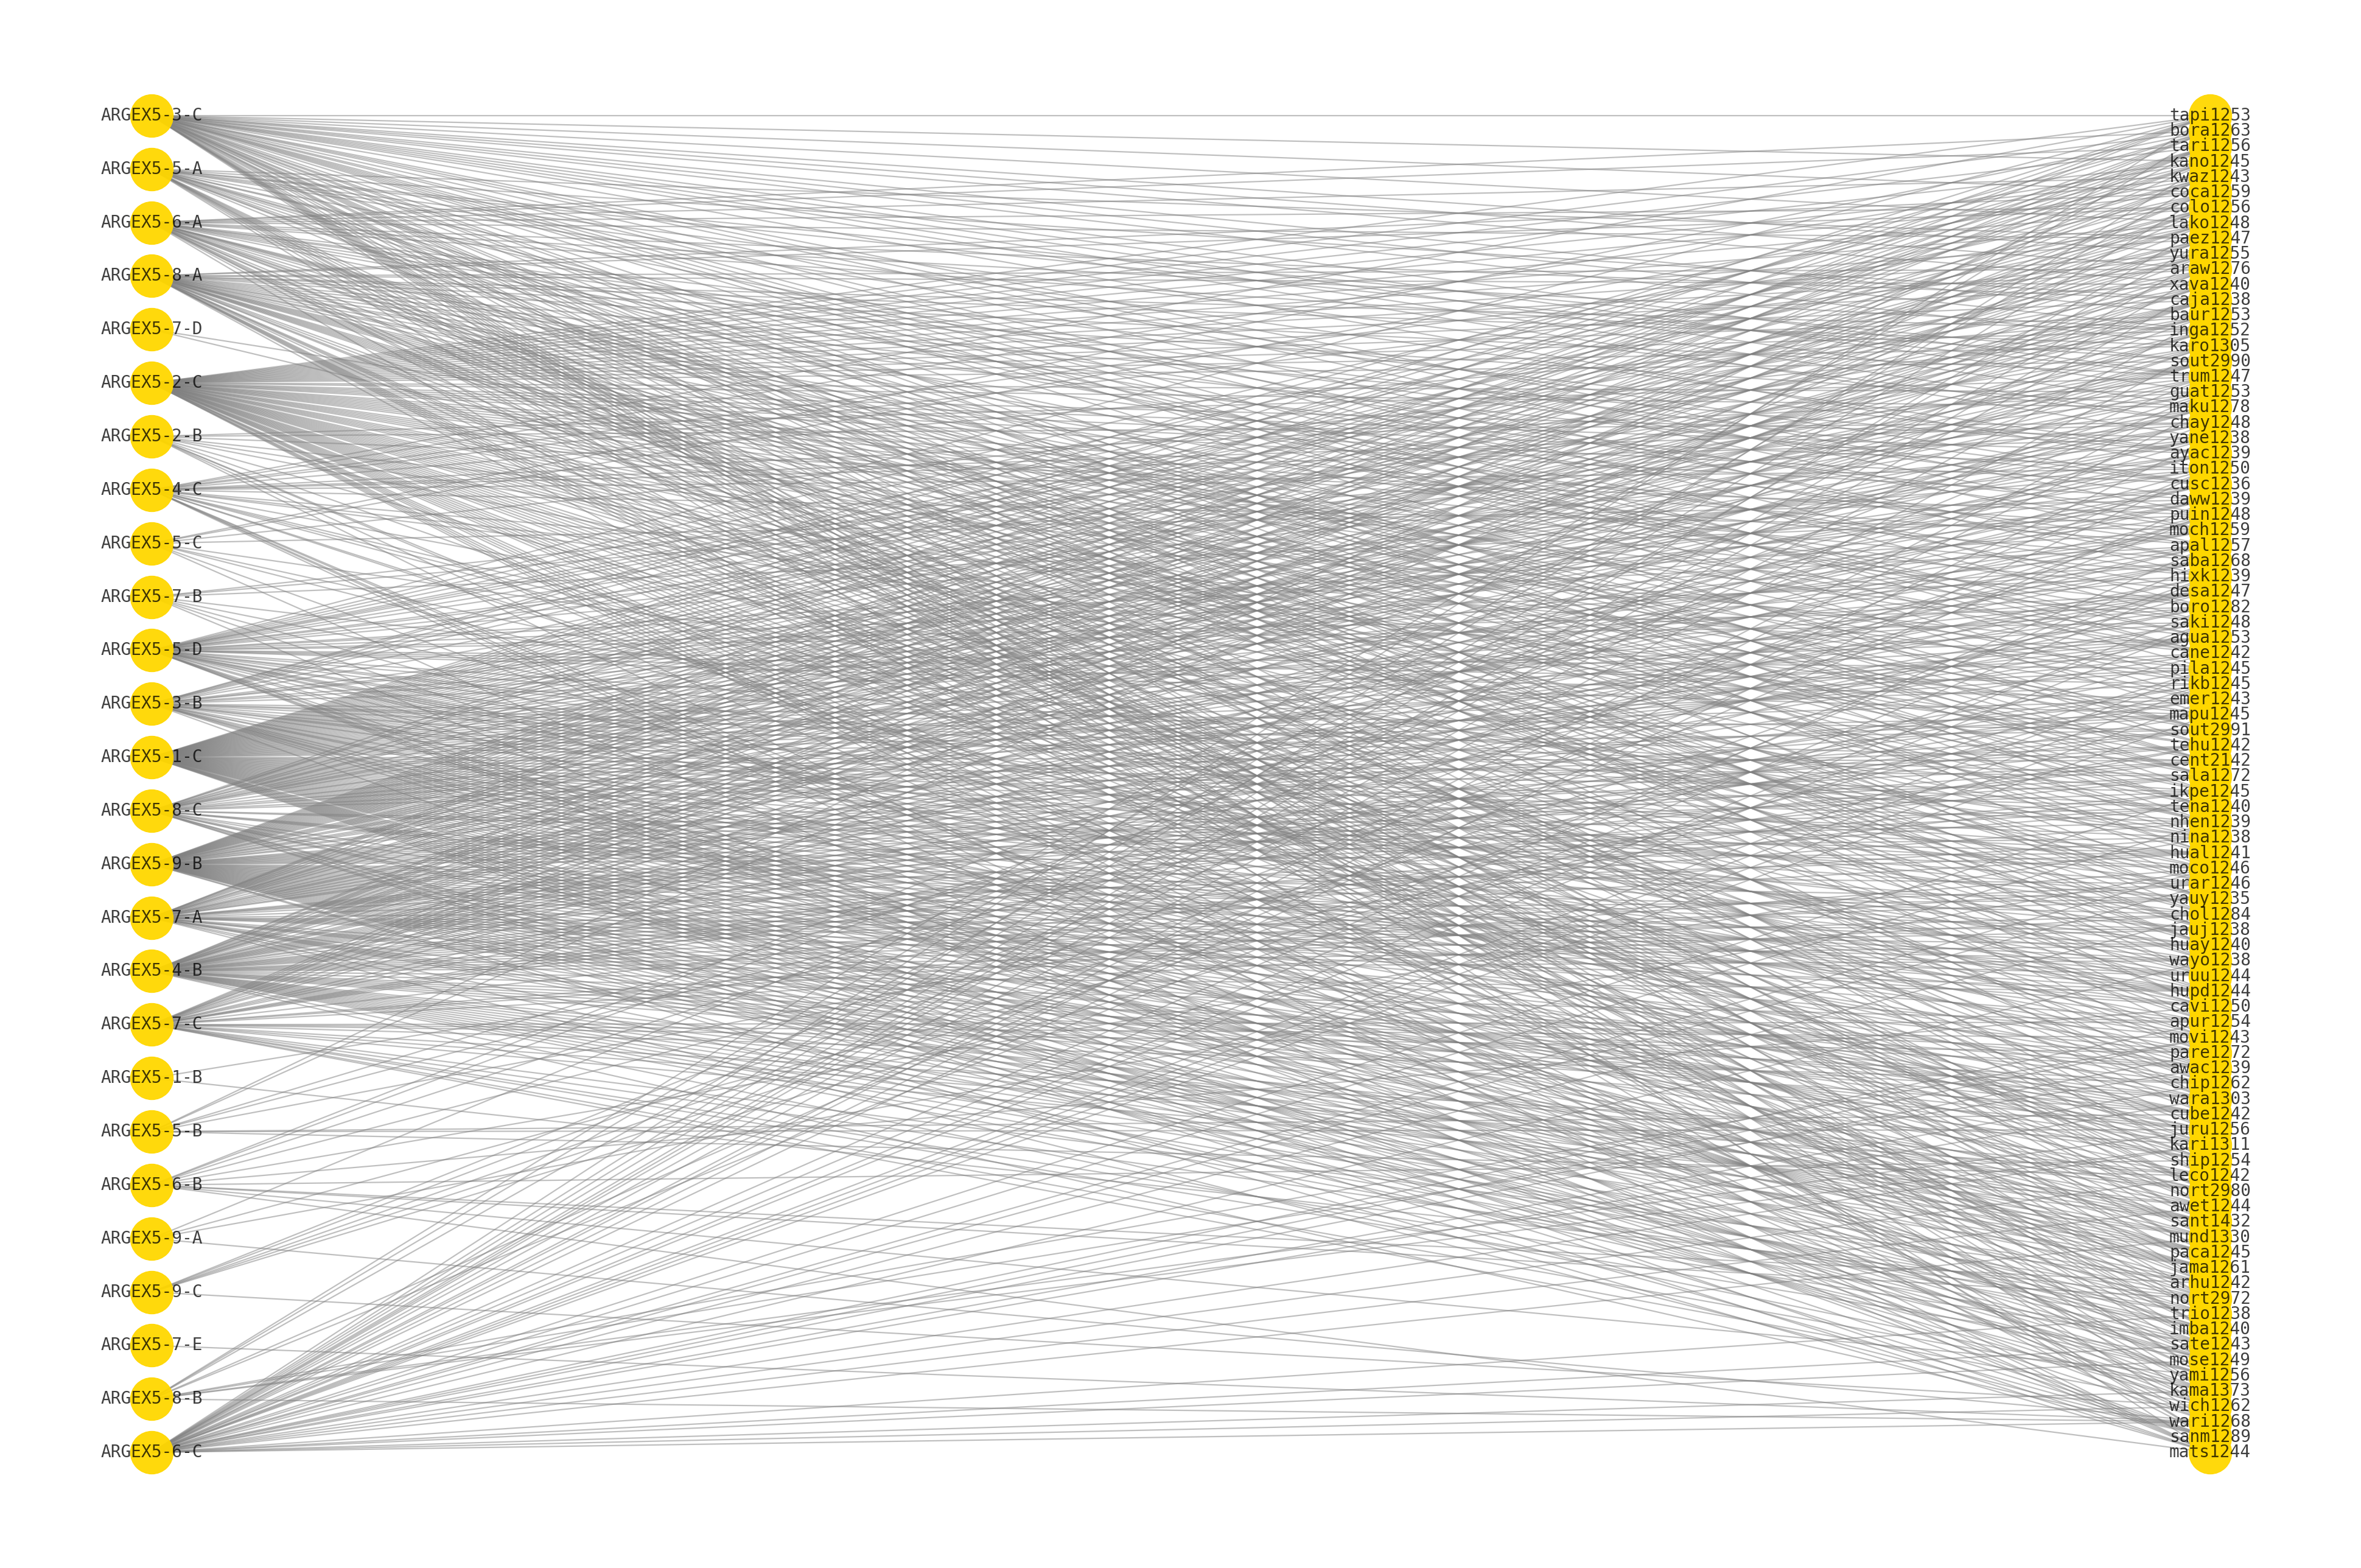

In [378]:
import matplotlib.pyplot as plt

bottom_nodes, top_nodes = bipartite.sets(B)

fig, ax = plt.subplots(dpi=800)
#labels = {i:id_family[i] for i in G.nodes()}# if id_family[i] in ['quec1387','jiva1245','pano1259']}
        
#pos = nx.kamada_kawai_layout(B)
labels={i:i for i in B.nodes}
pos = nx.bipartite_layout(B,top_nodes)
#pos = {key:location[key] for key in g.nodes()}#nx.spectral_layout(g)
#pos = {node: (y,x) for (node, (x,y)) in pos.items()}

nx.draw_networkx_nodes(B, pos, node_size = 40, node_color='gold',node_shape='o',alpha=0.95, linewidths=0.1) 
nx.draw_networkx_edges(B, pos, alpha=0.5,width=0.2,edge_color='gray')
nx.draw_networkx_labels(B,pos,labels,alpha=0.75,font_size=2.5,font_color='k',font_family='monospace')
plt.axis('off')
#plt.title('Graph with '+str(len(G))+' languages of South America',fontsize=9)
#plt.savefig('graph.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [398]:
projected_B = nx.maximum_spanning_tree(bipartite.collaboration_weighted_projected_graph(B, bottom_nodes))

In [399]:
len(projected_B.edges())

87

In [400]:
projected_B.nodes()

NodeView(('mats1244', 'wari1268', 'mose1249', 'sate1243', 'trio1238', 'paca1245', 'mund1330', 'sant1432', 'awet1244', 'leco1242', 'cube1242', 'wara1303', 'awac1239', 'pare1272', 'uruu1244', 'wayo1238', 'huay1240', 'jauj1238', 'moco1246', 'hual1241', 'nhen1239', 'ikpe1245', 'cent2142', 'sout2991', 'emer1243', 'rikb1245', 'pila1245', 'saba1268', 'apal1257', 'daww1239', 'ayac1239', 'guat1253', 'trum1247', 'karo1305', 'inga1252', 'caja1238', 'xava1240', 'araw1276', 'paez1247', 'lako1248', 'colo1256', 'coca1259', 'kwaz1243', 'kano1245', 'tari1256', 'bora1263', 'sanm1289', 'wich1262', 'kama1373', 'yami1256', 'imba1240', 'nort2972', 'arhu1242', 'jama1261', 'nort2980', 'ship1254', 'kari1311', 'juru1256', 'chip1262', 'movi1243', 'apur1254', 'cavi1250', 'hupd1244', 'chol1284', 'yauy1235', 'urar1246', 'nina1238', 'tena1240', 'sala1272', 'tehu1242', 'mapu1245', 'cane1242', 'agua1253', 'saki1248', 'boro1282', 'desa1247', 'moch1259', 'hixk1239', 'puin1248', 'cusc1236', 'iton1250', 'yane1238', 'chay1

In [401]:
onion = nx.onion_layers(projected_B)

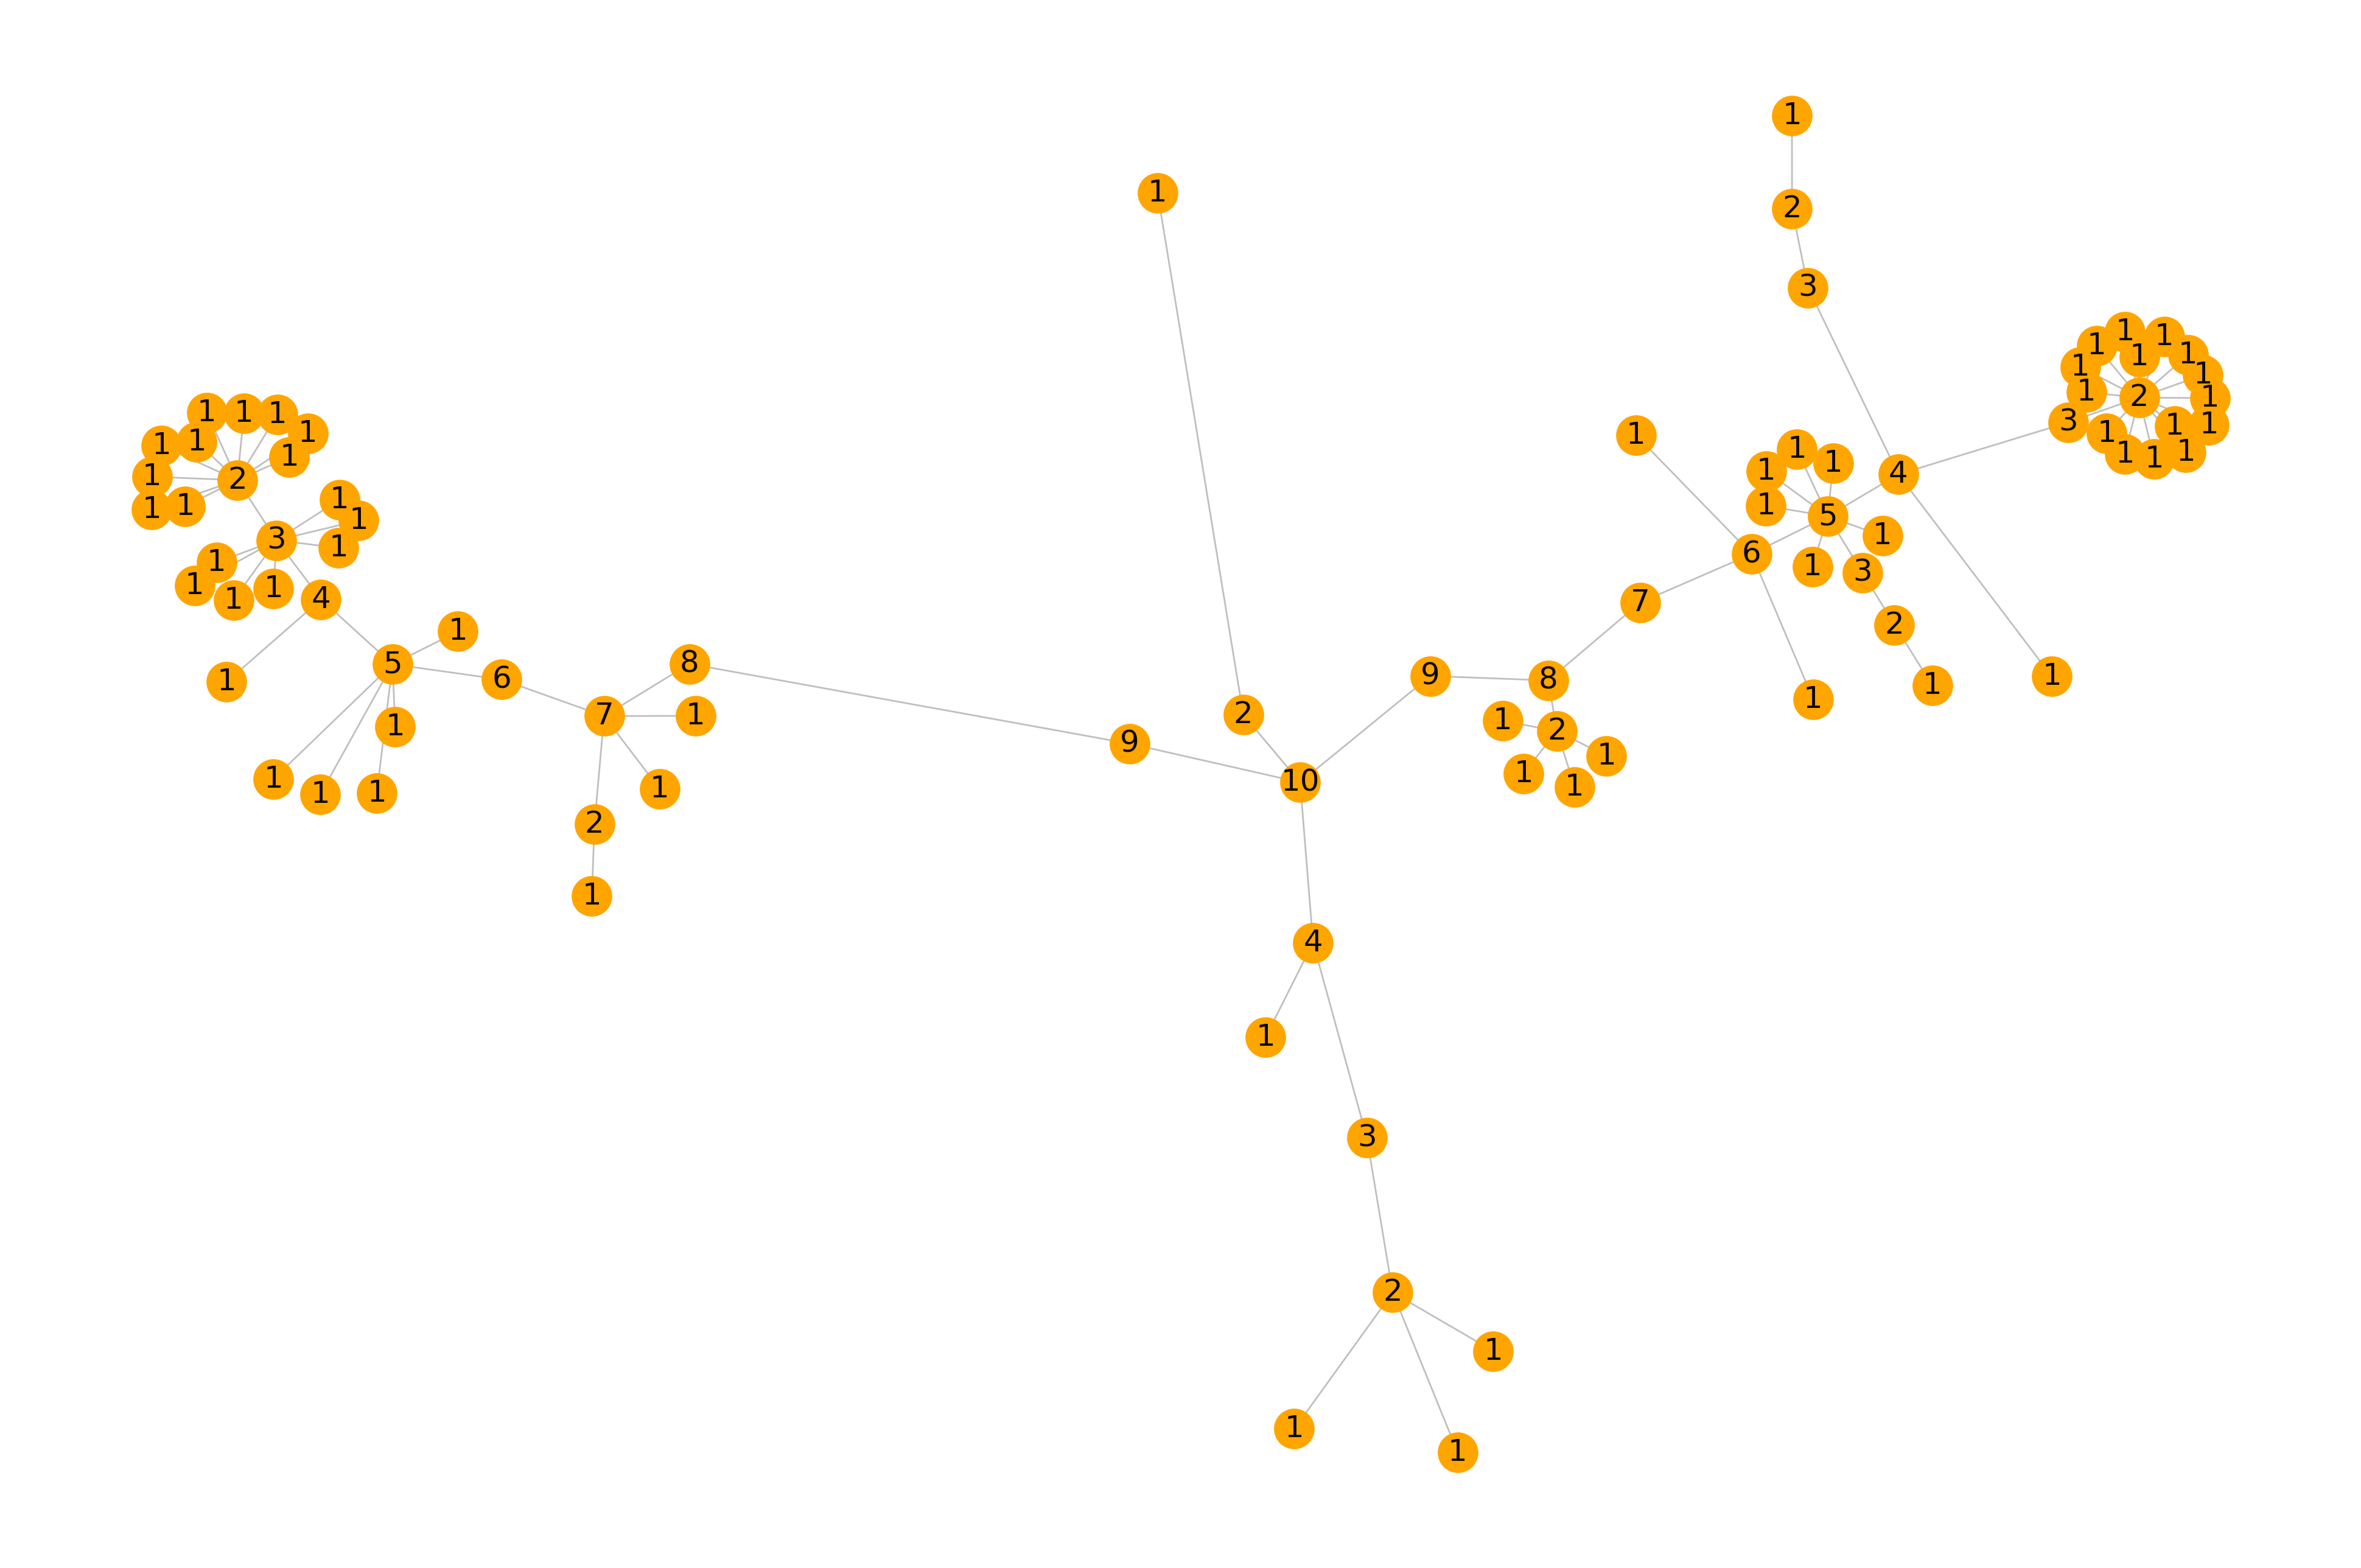

In [402]:
fig, ax = plt.subplots(dpi=800)
pos = nx.kamada_kawai_layout(projected_B)
## probar otros algoritmos! :)
centrality = dict(nx.closeness_centrality(projected_B))
## orden por centralidad!
ordered_centrality = {k: v for k, v in sorted(centrality.items(), key=lambda item: item[1],reverse=True)}
labels = {i:onion[i] for i in projected_B.nodes}
nx.draw_networkx_nodes(projected_B, pos,node_size = 25, node_color='orange') 
nx.draw_networkx_edges(projected_B, pos, alpha=0.5,width=0.25,edge_color='gray')
nx.draw_networkx_labels(projected_B,pos,labels,alpha=0.95,font_size=4.5,font_color='k')
plt.axis('off')
plt.show()

In [420]:
import pickle

status = pickle.load(open("status.p", "rb"))

In [423]:
status = {key:status[key] for key in projected_B.nodes}

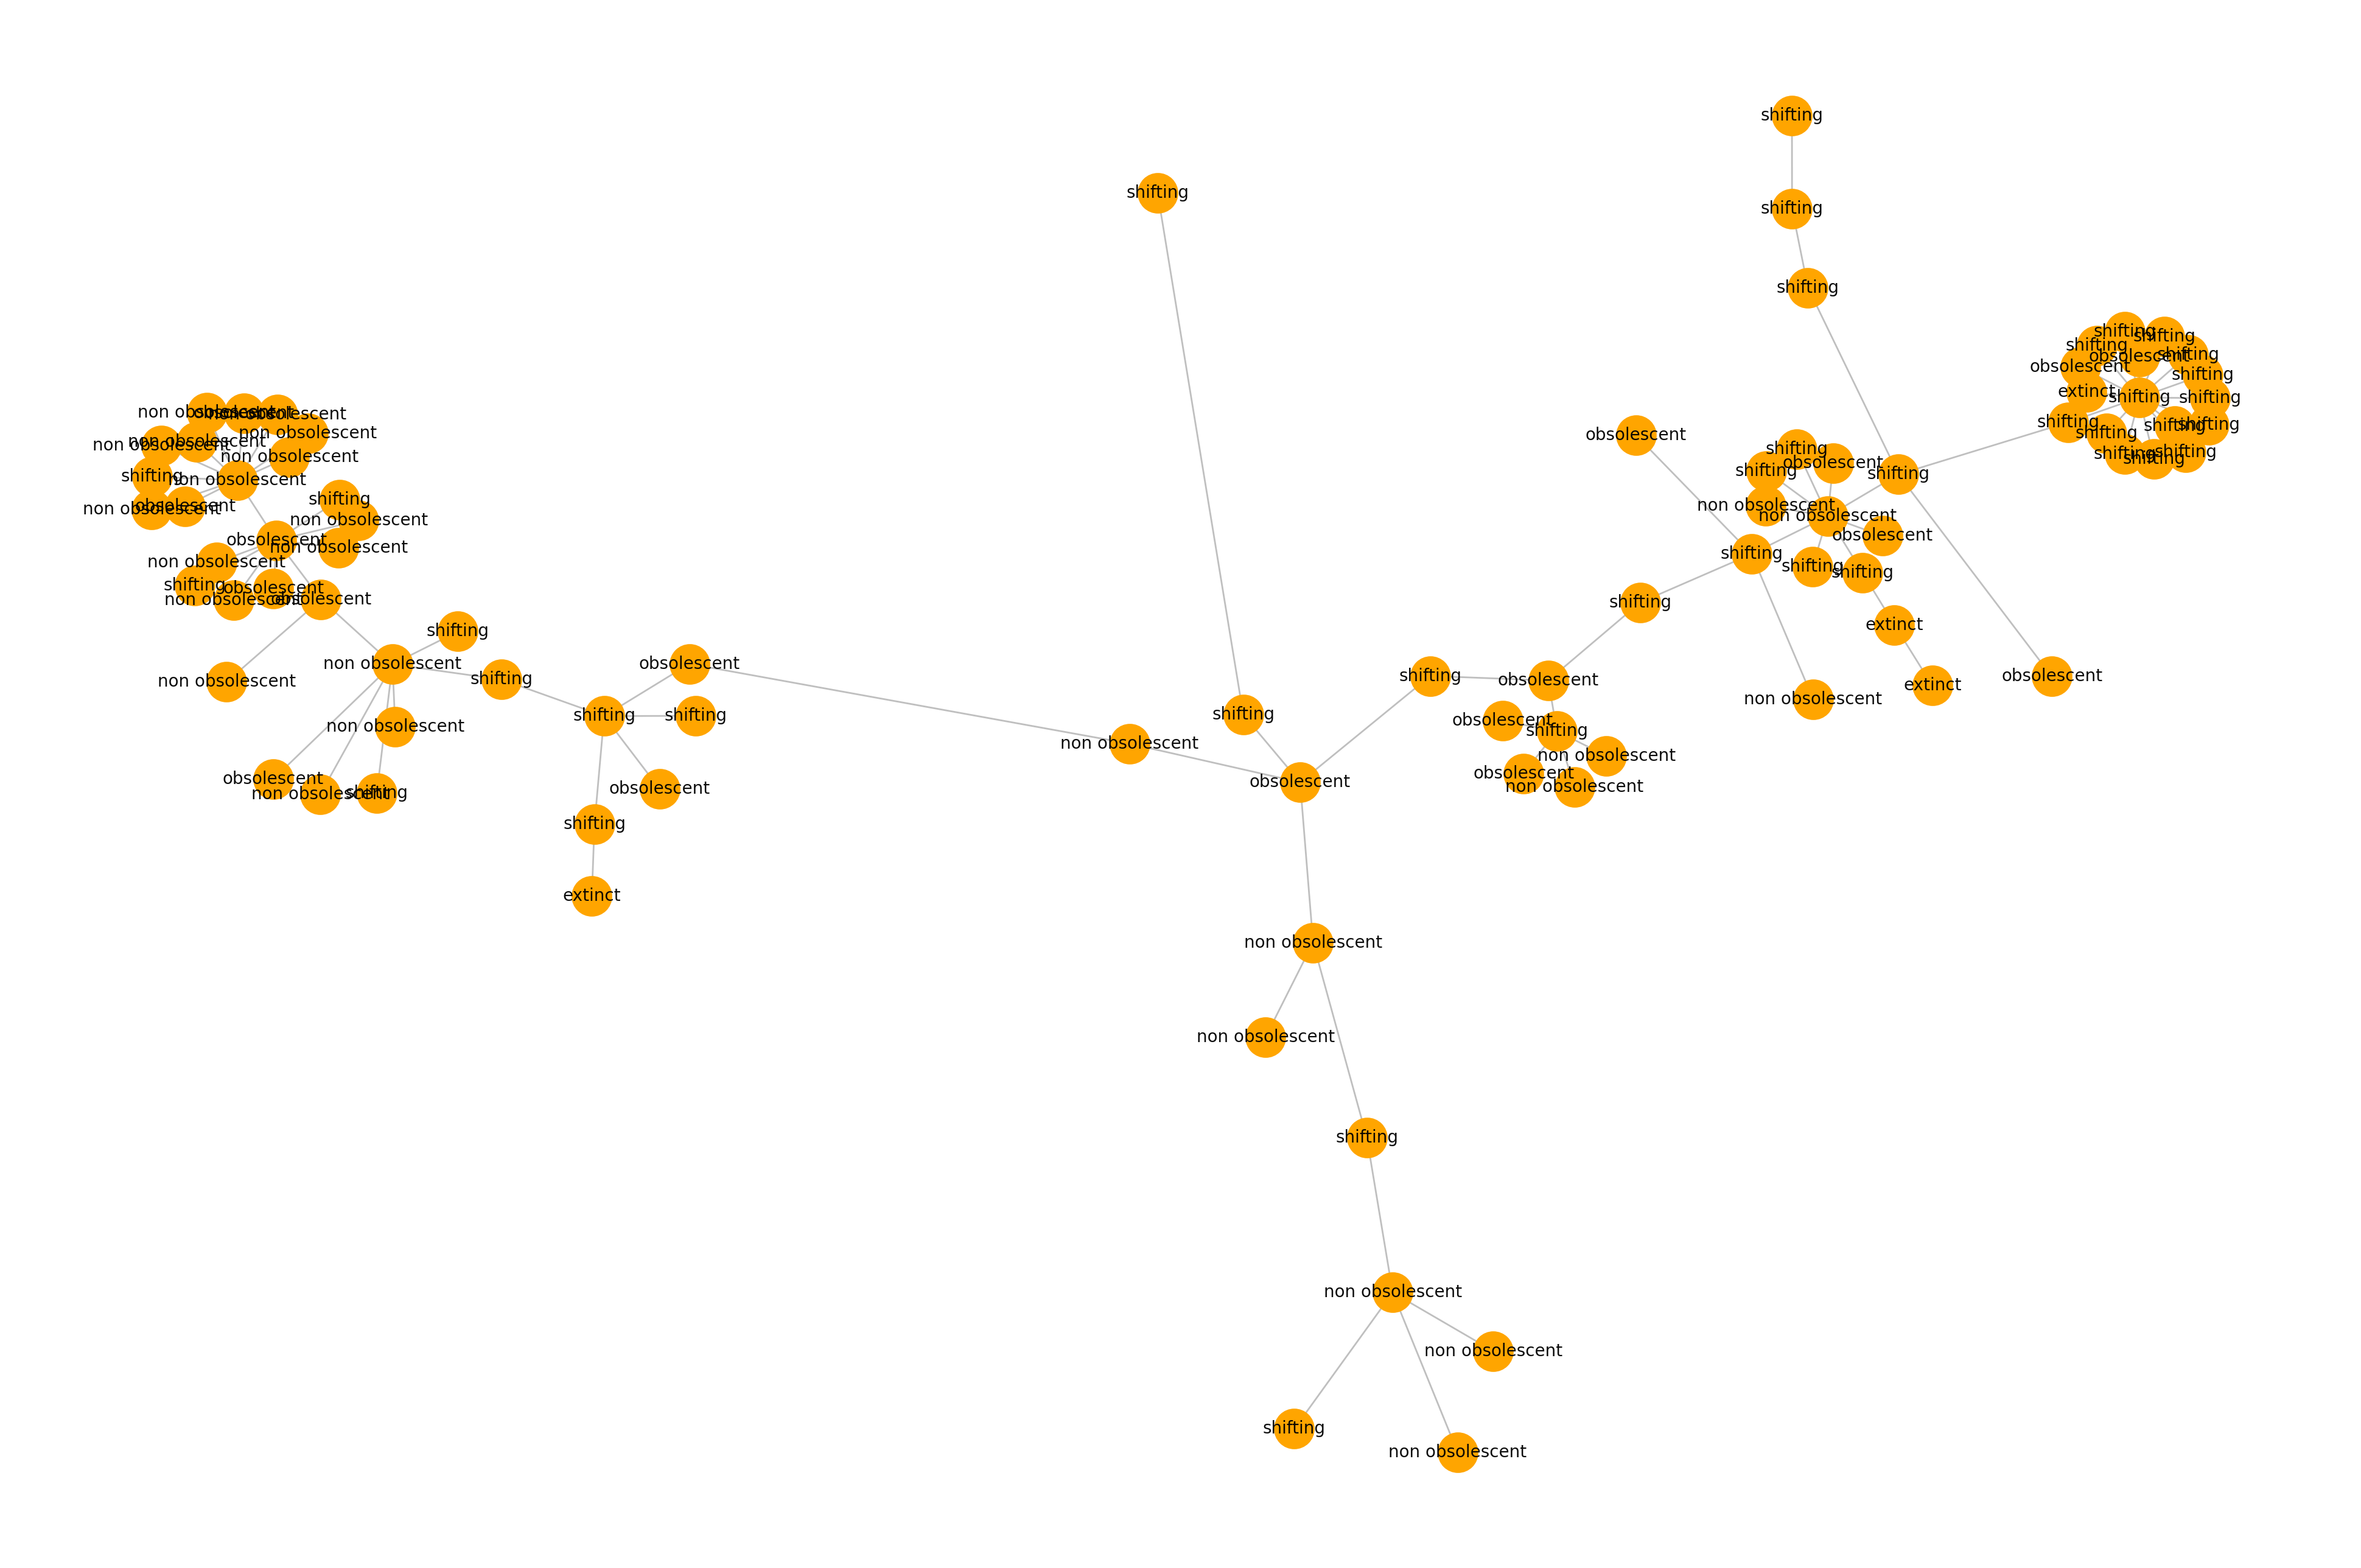

In [424]:
fig, ax = plt.subplots(dpi=800)
pos = nx.kamada_kawai_layout(projected_B)
## probar otros algoritmos! :)
centrality = dict(nx.closeness_centrality(projected_B))
## orden por centralidad!
ordered_centrality = {k: v for k, v in sorted(centrality.items(), key=lambda item: item[1],reverse=True)}
labels = {i:status[i] for i in projected_B.nodes}
nx.draw_networkx_nodes(projected_B, pos,node_size = 25, node_color='orange') 
nx.draw_networkx_edges(projected_B, pos, alpha=0.5,width=0.25,edge_color='gray')
nx.draw_networkx_labels(projected_B,pos,labels,alpha=0.95,font_size=2.5,font_color='k')
plt.axis('off')
plt.show()

In [426]:
from collections import defaultdict

v = defaultdict(list)

for key, value in sorted(status.items()):
    v[value].append(key)

In [427]:
status_list = dict(v)

In [428]:
status_list.keys()

dict_keys(['non obsolescent', 'shifting', 'obsolescent', 'extinct'])

In [403]:
from collections import defaultdict

v = defaultdict(list)

for key, value in sorted(onion.items()):
    v[value].append(key)

In [404]:
onion_list = dict(v)

In [405]:
sorted(onion_list.keys())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

## (4) Algunos cálculos de robustez

In [406]:
B = projected_B.copy()

componentes = {}

for layer in sorted(onion_list.keys()):
    nodes = onion_list[layer]
    B.remove_nodes_from(nodes)
    componentes[layer]=nx.number_connected_components(B)

In [407]:
componentes

{1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 0}

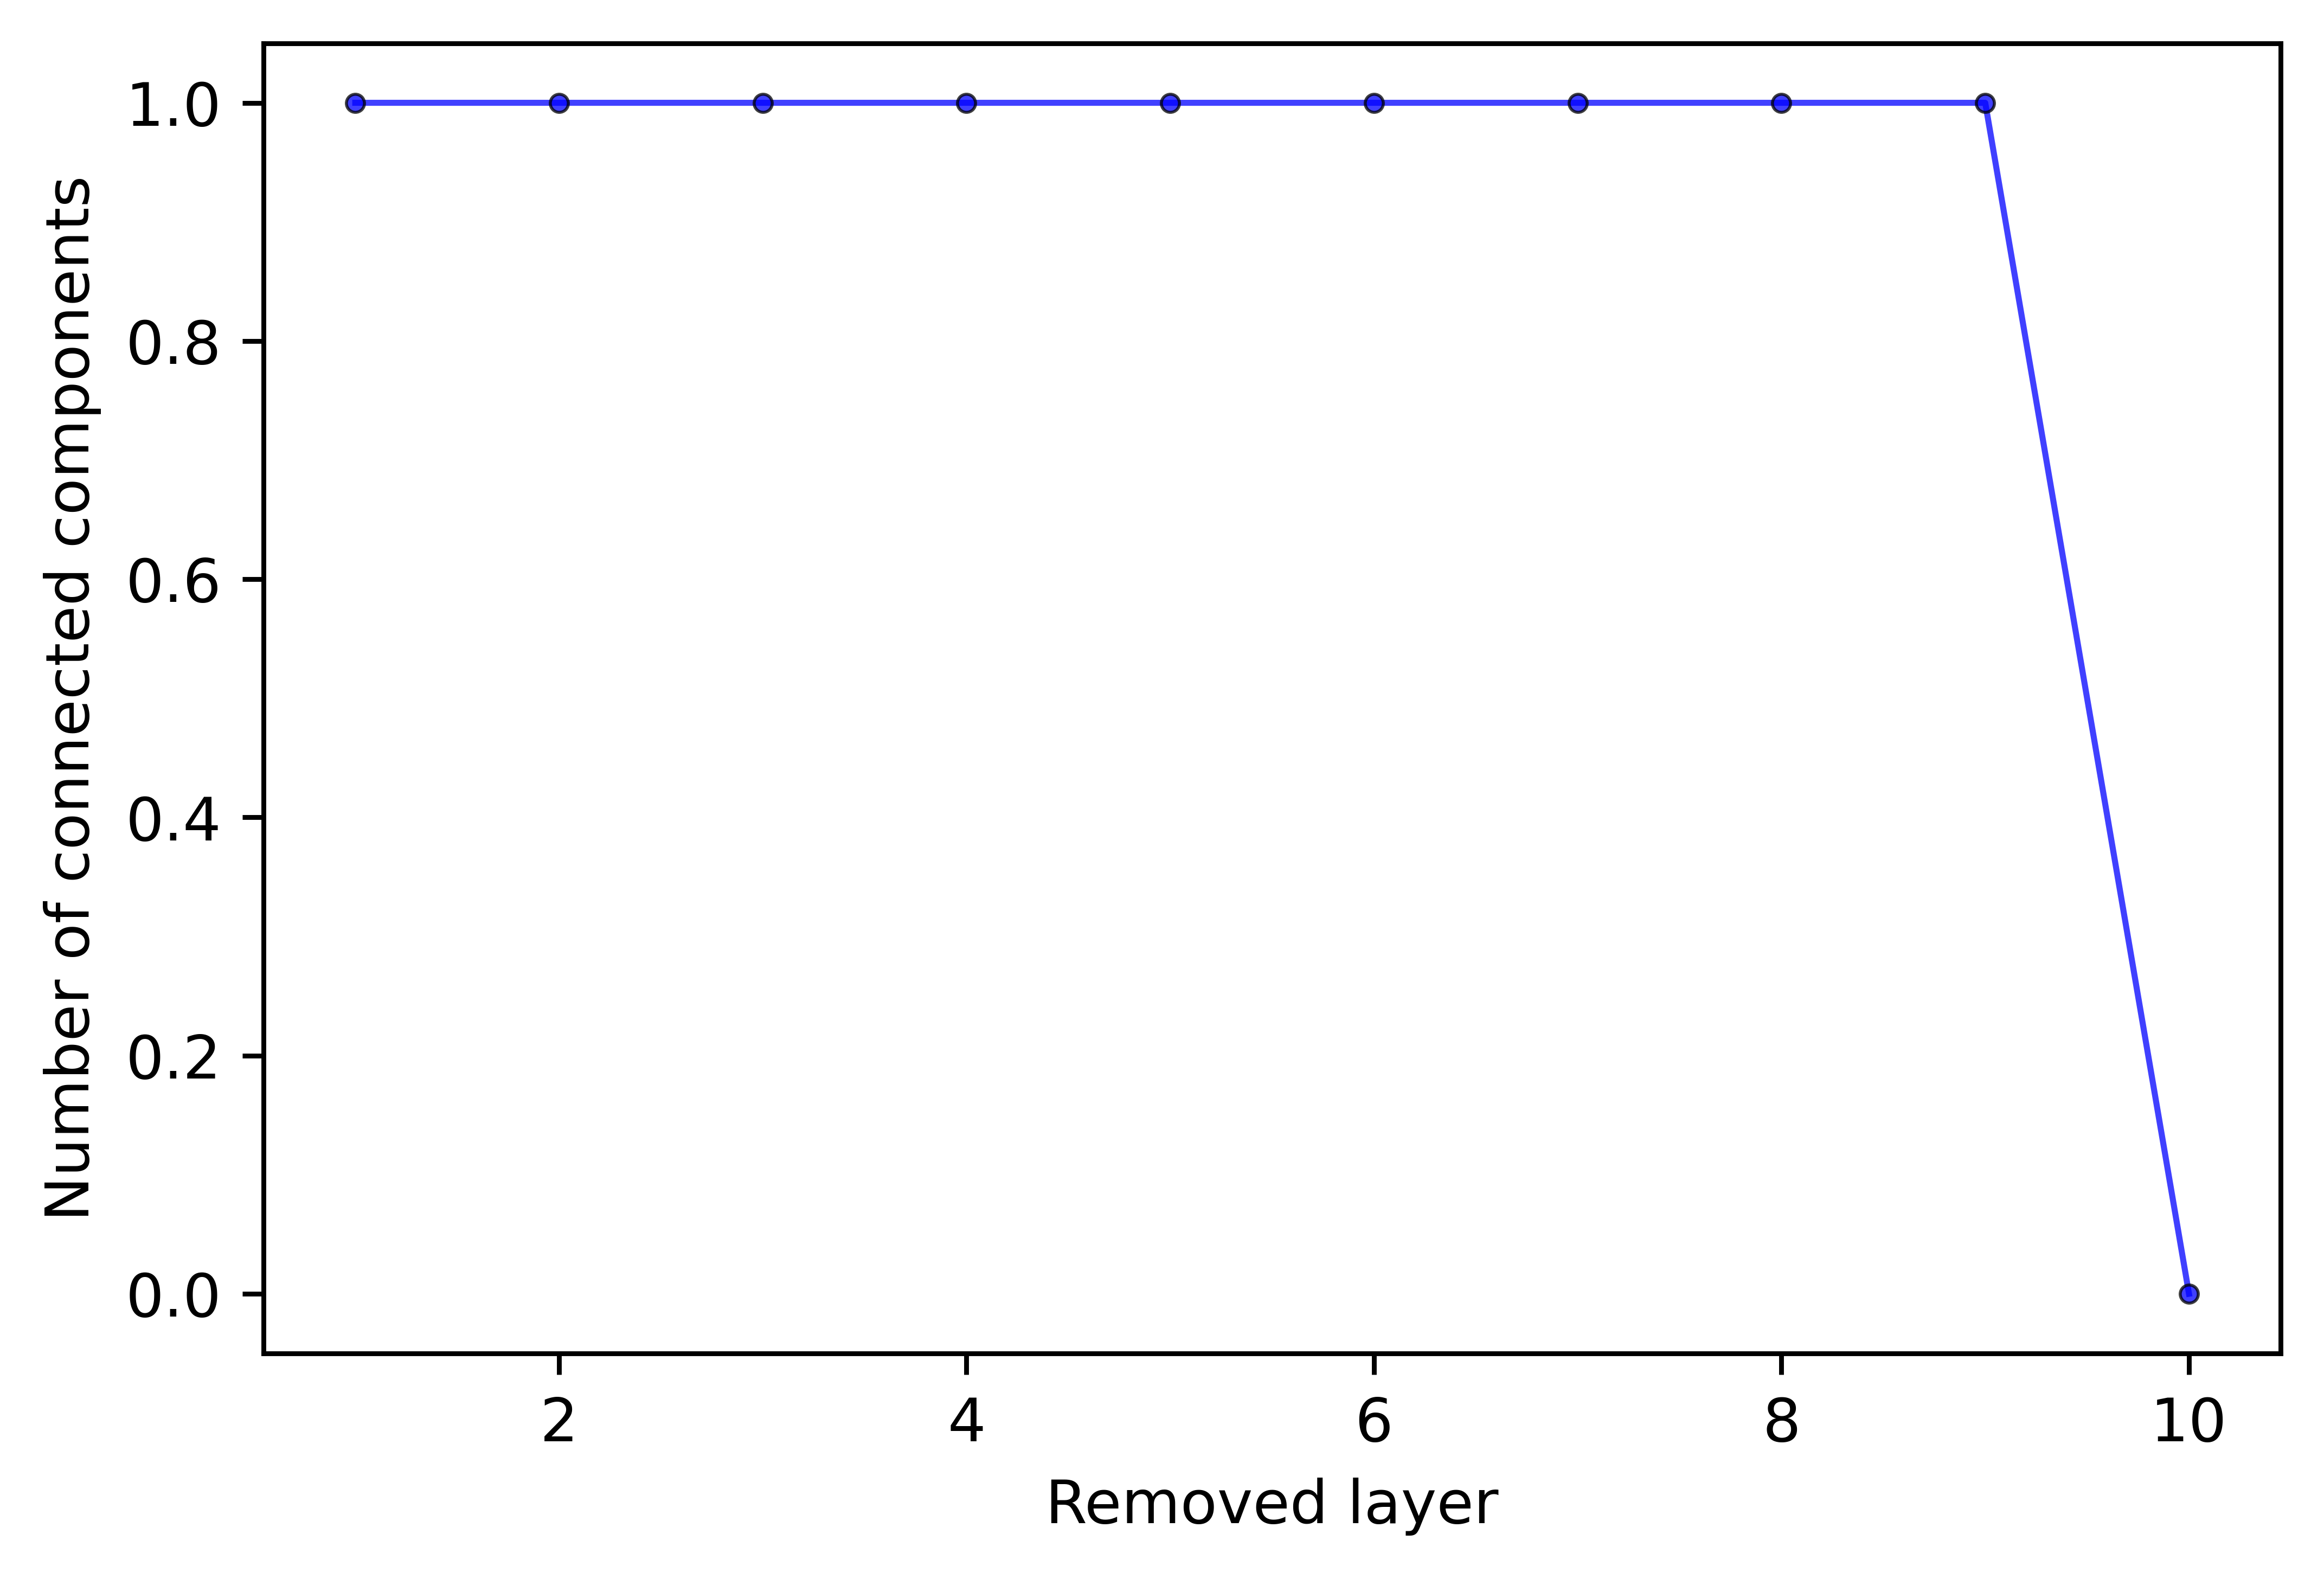

In [411]:
fig, ax = plt.subplots(dpi=800)
#plt.title('obsolescent languages',fontsize=12)

ax.plot(componentes.keys(),componentes.values(),marker='o',color='blue',markersize=3,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,linewidth=1,fillstyle='full',clip_on=True)

#plt.grid(False)
#plt.legend(loc='best',fontsize=7)
#plt.xticks(rotation=90)
plt.xlabel(r'Removed layer',fontsize=10)
plt.ylabel(r'Number of connected components',fontsize=10)
plt.rcParams.update({'font.size': 10})
#plt.savefig('H.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [361]:
B = projected_B.copy()

componentes_reverse = {}

for layer in sorted(onion_list.keys(),reverse=True):
    nodes = onion_list[layer]
    B.remove_nodes_from(nodes)
    componentes_reverse[layer]=nx.number_connected_components(B)

In [416]:
componentes_reverse.keys()

dict_keys([10, 9, 8, 7, 6, 5, 4, 3, 2, 1])

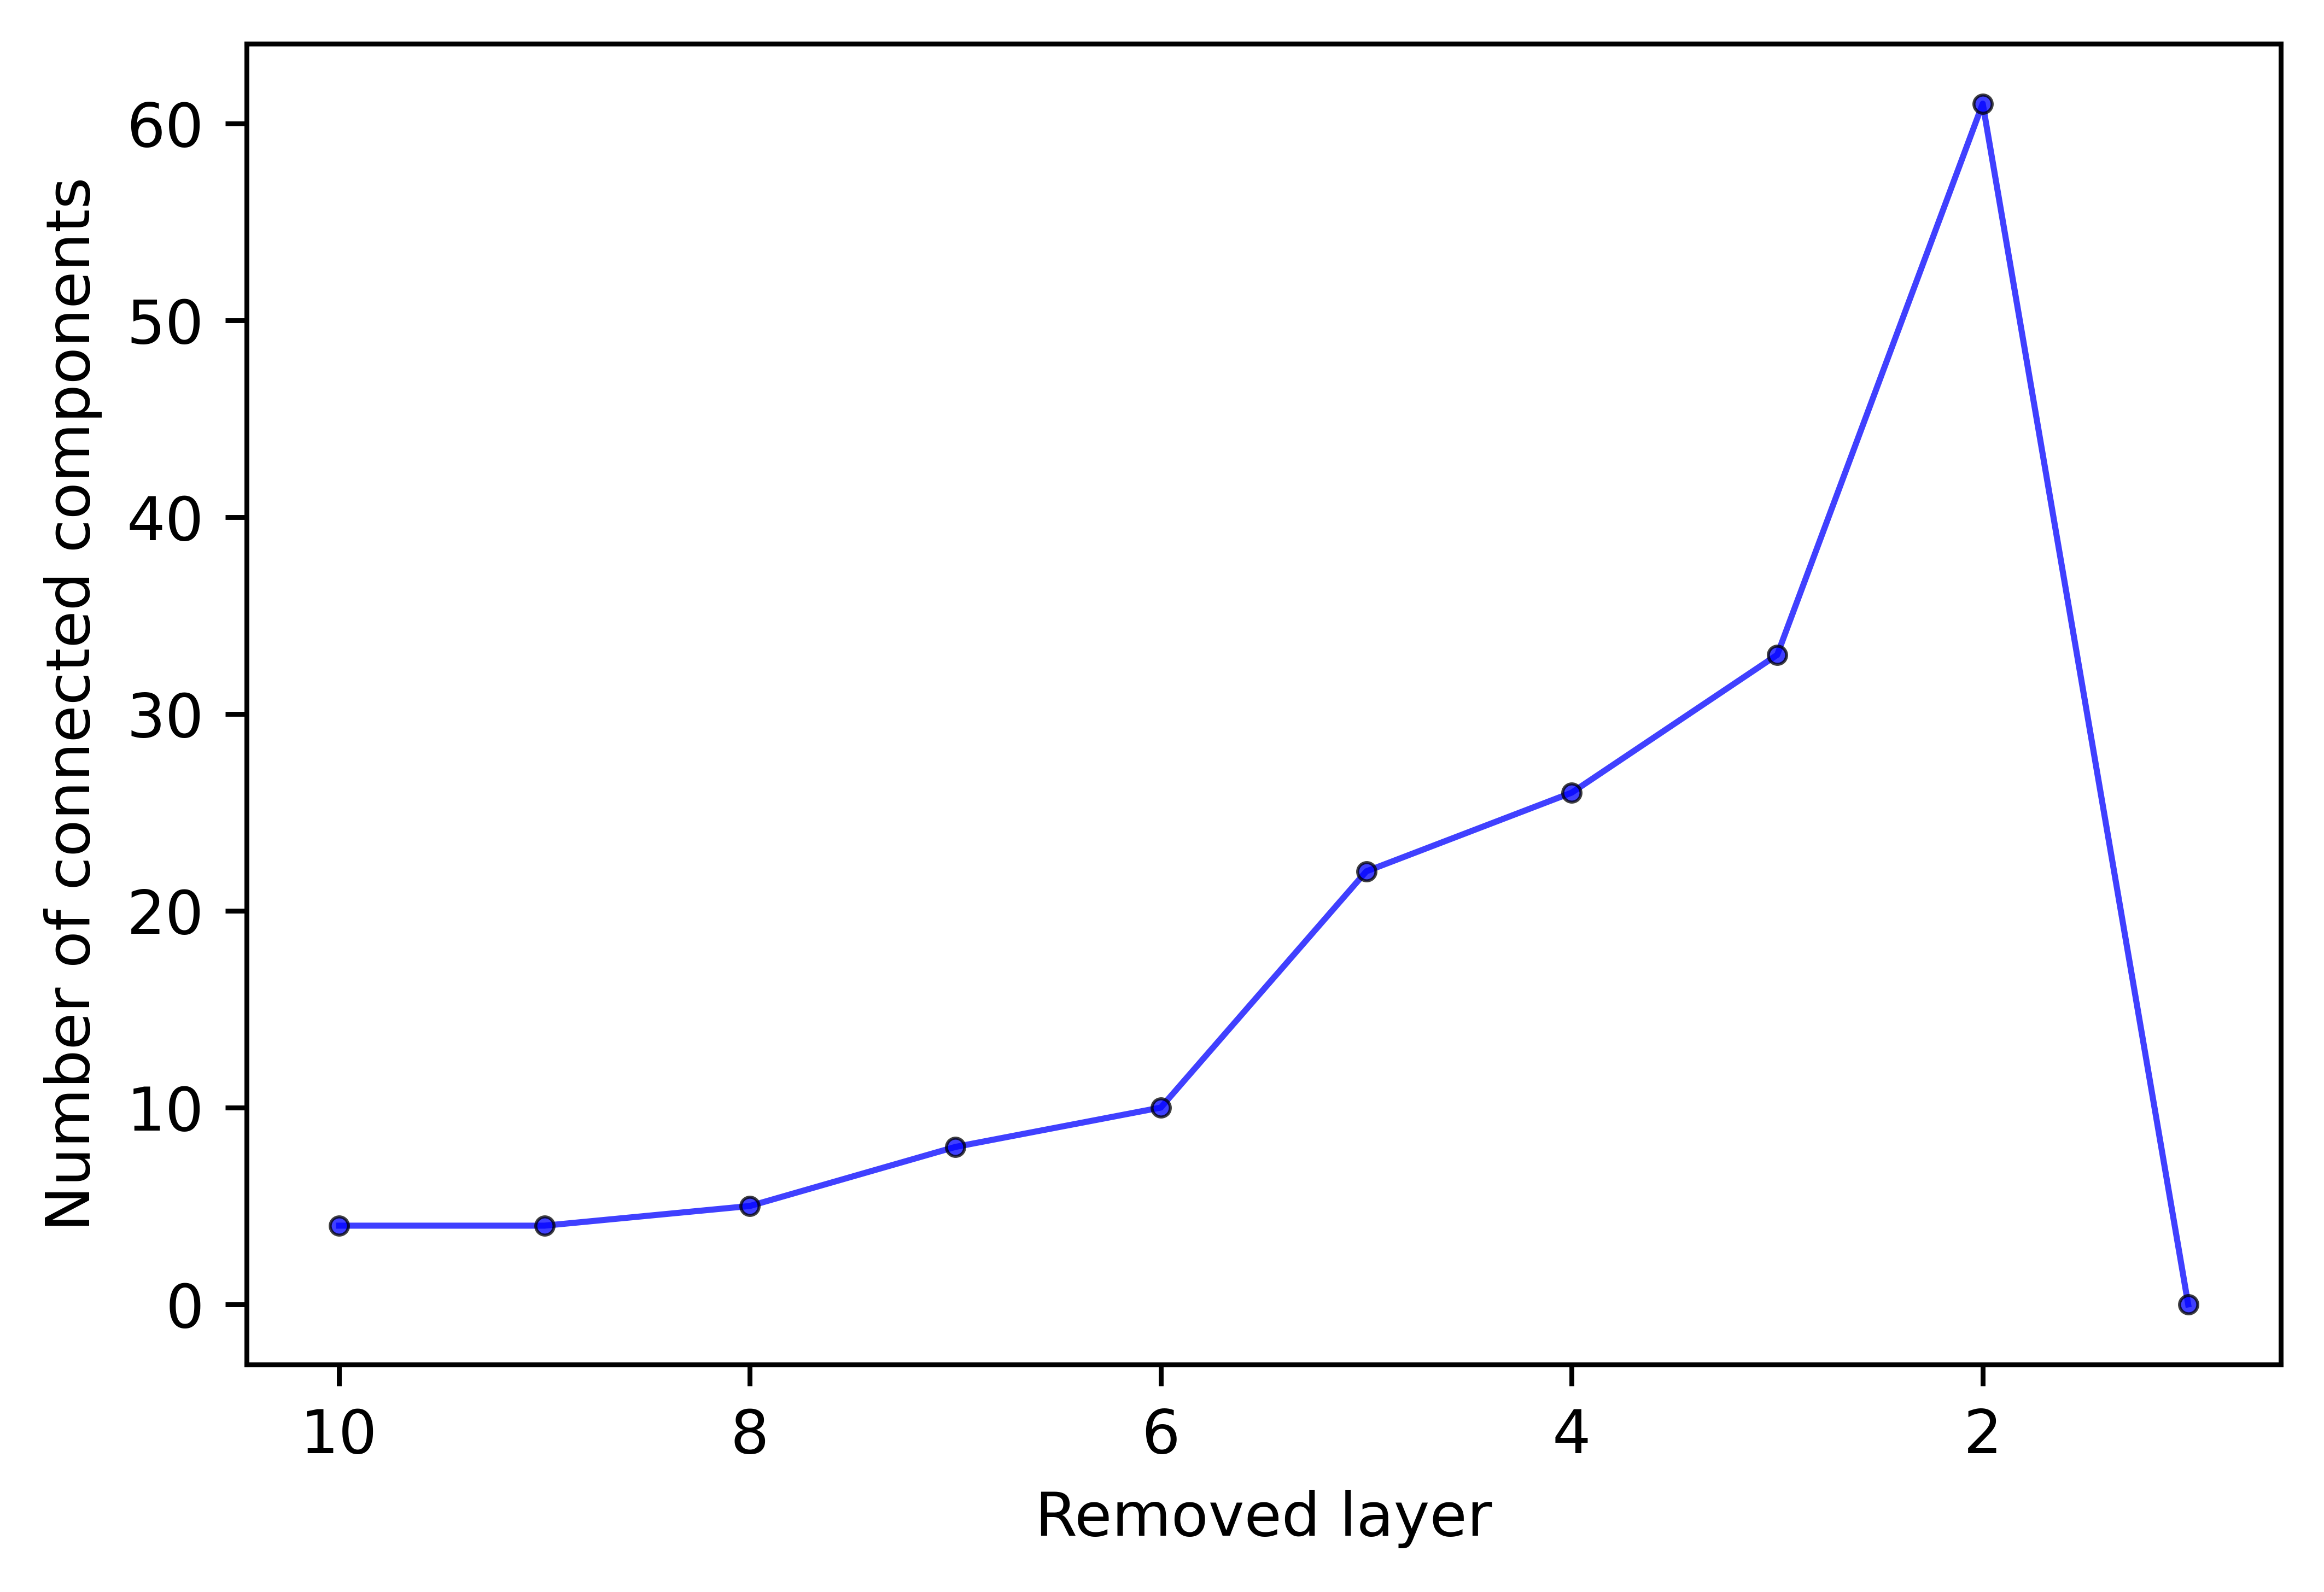

In [419]:
fig, ax = plt.subplots(dpi=800)
#plt.title('obsolescent languages',fontsize=12)

ax.plot(componentes_reverse.keys(),componentes_reverse.values(),marker='o',color='blue',markersize=3,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,linewidth=1,fillstyle='full',clip_on=True)
ax.invert_xaxis()
#plt.grid(False)
#plt.legend(loc='best',fontsize=7)
#plt.xticks(rotation=90)
plt.xlabel(r'Removed layer',fontsize=10)
plt.ylabel(r'Number of connected components',fontsize=10)
plt.rcParams.update({'font.size': 10})
#plt.savefig('H.pdf', format='pdf', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

In [430]:
B = projected_B.copy()

componentes = {}

for layer in ['extinct','obsolescent', 'shifting', 'non obsolescent']:
    nodes = status_list[layer]
    B.remove_nodes_from(nodes)
    componentes[layer]=nx.number_connected_components(B)

In [431]:
componentes

{'extinct': 1, 'obsolescent': 15, 'shifting': 14, 'non obsolescent': 0}

In [432]:
B = projected_B.copy()

componentes_reverse = {}

for layer in status_list.keys():
    nodes = status_list[layer]
    B.remove_nodes_from(nodes)
    componentes_reverse[layer]=nx.number_connected_components(B)

In [433]:
componentes_reverse

{'non obsolescent': 18, 'shifting': 19, 'obsolescent': 3, 'extinct': 0}